#Clustering | Assignment

Q-1 : What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

A-1 : Difference:

K-Means: A partition-based method that requires you to predefine the number of clusters (k). It works by minimizing the distance of points from their cluster centers.

Hierarchical Clustering: A tree-based method that builds a hierarchy (dendrogram) of clusters without needing to predefine the number of clusters.

Use cases:

K-Means: Customer segmentation in marketing (e.g., grouping customers based on spending patterns).

Hierarchical Clustering: Document clustering in text mining, where a hierarchy of topics is useful.

Q-2 : Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.


A-2 : The Silhouette Score measures how well data points fit within their assigned clusters compared to other clusters.

A score close to +1 means the point is well-matched to its cluster and far from others.

A score near 0 means the point lies between two clusters.

A negative score means it may have been assigned to the wrong cluster.

Purpose: It helps evaluate the quality of clustering and decide the optimal number of clusters.

Q-3 : : What are the core parameters of DBSCAN, and how do they influence the
clustering process?

A-3: The core parameters of DBSCAN are:

ε (Epsilon / Neighborhood radius): Defines the maximum distance within which points are considered neighbors.

Smaller ε → more, smaller clusters (risk of many noise points).

Larger ε → fewer, bigger clusters (risk of merging distinct clusters).

MinPts (Minimum Points): Minimum number of points required to form a dense region (a cluster).

Smaller MinPts → more clusters, including small ones.

Larger MinPts → fewer clusters, only strong dense regions survive.

Together, ε and MinPts determine cluster density: points in dense regions form clusters, while sparse points are treated as noise/outliers.

Q-4 : Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?

A-4 : Feature scaling is important because clustering algorithms like K-Means and DBSCAN rely on distance measures (e.g., Euclidean distance) to group data points.

Without scaling, features with larger numerical ranges dominate the distance calculation, leading to biased clusters.

Scaling (e.g., standardization or normalization) ensures that all features contribute equally, improving clustering accuracy and fairness.

In short: Scaling prevents distortion in distance-based clustering results.

Q-5 : What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?

A-5 : The Elbow Method is a technique used in K-Means clustering to find the optimal number of clusters (k).

It involves plotting the Within-Cluster Sum of Squares (WCSS) against different values of k.

As k increases, WCSS decreases, but after a certain point the improvement becomes marginal.

The point where the curve bends like an “elbow” is considered the optimal k, since adding more clusters beyond it doesn’t significantly improve clustering.

In short: The Elbow Method helps balance model simplicity and clustering accuracy by choosing the right number of clusters.

Q-6 : Dataset:
Use make_blobs, make_moons, and sklearn.datasets.load_wine() as
specified.
Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.
(Include your Python code and output in the code box below.)

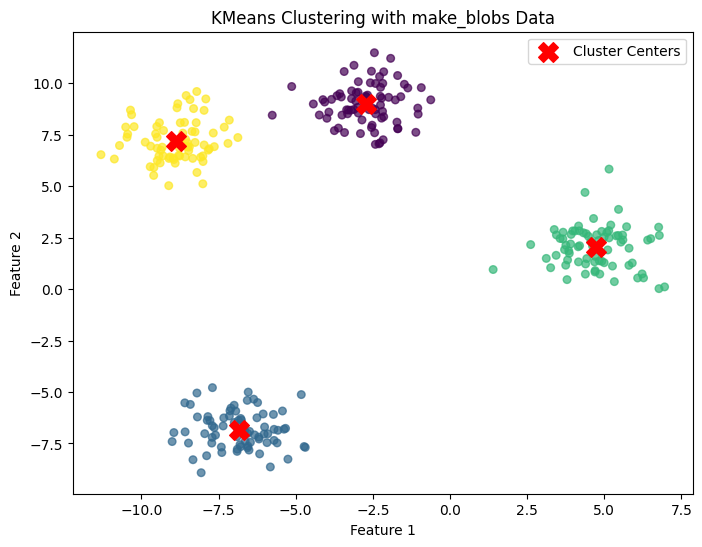

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with 4 centers
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Plot the clusters and their centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=30, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Cluster Centers')
plt.title("KMeans Clustering with make_blobs Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Q-7 : Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).
(Include your Python code and output in the code box below.)


In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Wine dataset
wine = load_wine()
X = wine.data

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count number of clusters (excluding noise = label -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", n_clusters)


Number of clusters found (excluding noise): 0


Q-8 : Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.
(Include your Python code and output in the code box below.)

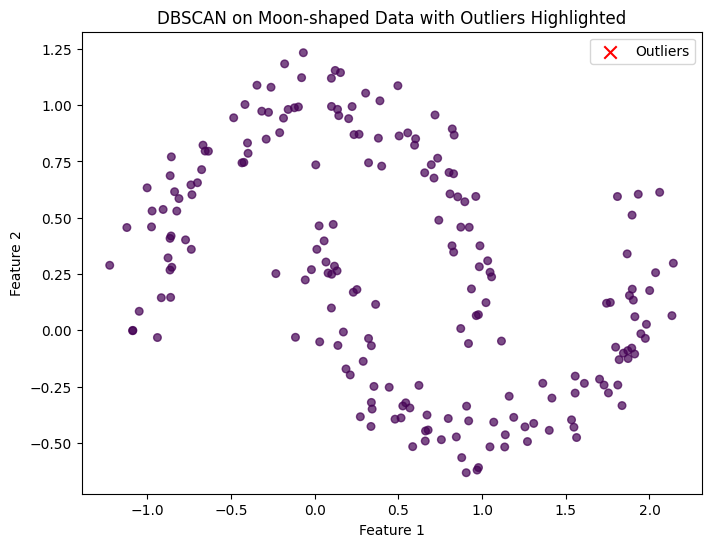

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate moon-shaped data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify outliers
outliers = labels == -1

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X[~outliers, 0], X[~outliers, 1], c=labels[~outliers], cmap="viridis", s=30, alpha=0.7)
plt.scatter(X[outliers, 0], X[outliers, 1], c="red", marker="x", s=80, label="Outliers")
plt.title("DBSCAN on Moon-shaped Data with Outliers Highlighted")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Q-9 : Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.
(Include your Python code and output in the code box below.)

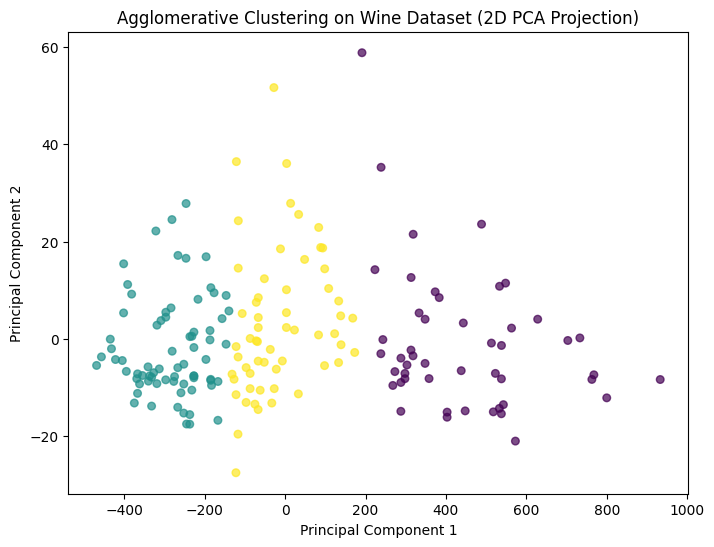

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load the Wine dataset
wine = load_wine()
X = wine.data

# Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)  # Wine dataset has 3 classes
labels = agg_cluster.fit_predict(X_pca)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=30, alpha=0.7)
plt.title("Agglomerative Clustering on Wine Dataset (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Q-10 : You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?
(Include your Python code and output in the code box below.)

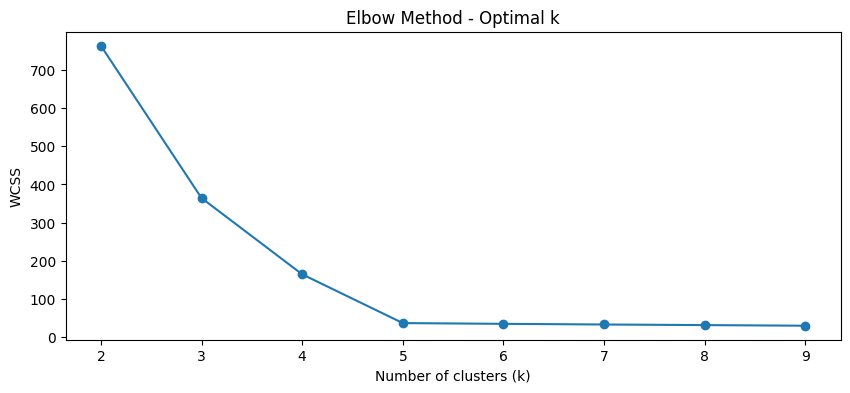

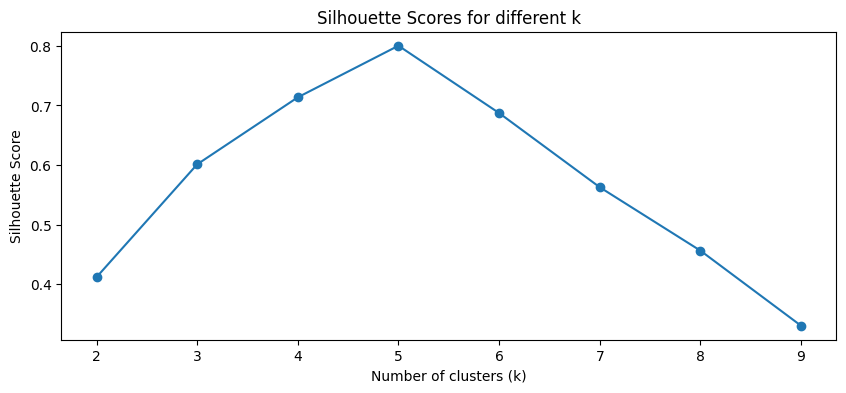

Cluster counts:
Cluster
1    60
2    60
3    60
4    60
0    60
Name: count, dtype: int64


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# ---- Step 1: Simulate customer dataset ----
# (In practice, you would load your real e-commerce dataset)
X, _ = make_blobs(n_samples=300, centers=5, n_features=4, random_state=42)
data = pd.DataFrame(X, columns=['Age', 'Annual_Income', 'Spending_Score', 'Purchase_Frequency'])

# ---- Step 2: Preprocessing ----
# Handle missing values (if any)
data = data.fillna(data.median(numeric_only=True))

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# ---- Step 3: Find optimal clusters ----
wcss = []
sil_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow Method
plt.figure(figsize=(10,4))
plt.plot(K, wcss, marker='o')
plt.title("Elbow Method - Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10,4))
plt.plot(K, sil_scores, marker='o')
plt.title("Silhouette Scores for different k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

# ---- Step 4: Train final KMeans model ----
optimal_k = 5   # Assume from Elbow & Silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)

print("Cluster counts:")
print(data['Cluster'].value_counts())